# 1. IMPORT NECESSARY LIBRARIES

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

# 2. LOAD DATASET

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/cbb.csv'
df = pd.read_csv(url)
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


# 3. DESCRIPTIVE DATASET DESCRIPTION

In [3]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Dataset Statistical Description ---")
print(df.describe())

print("\n--- Checking for Missing Values ---")
print(df.isnull().sum())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T

# 4. DATA VISUALIZATION

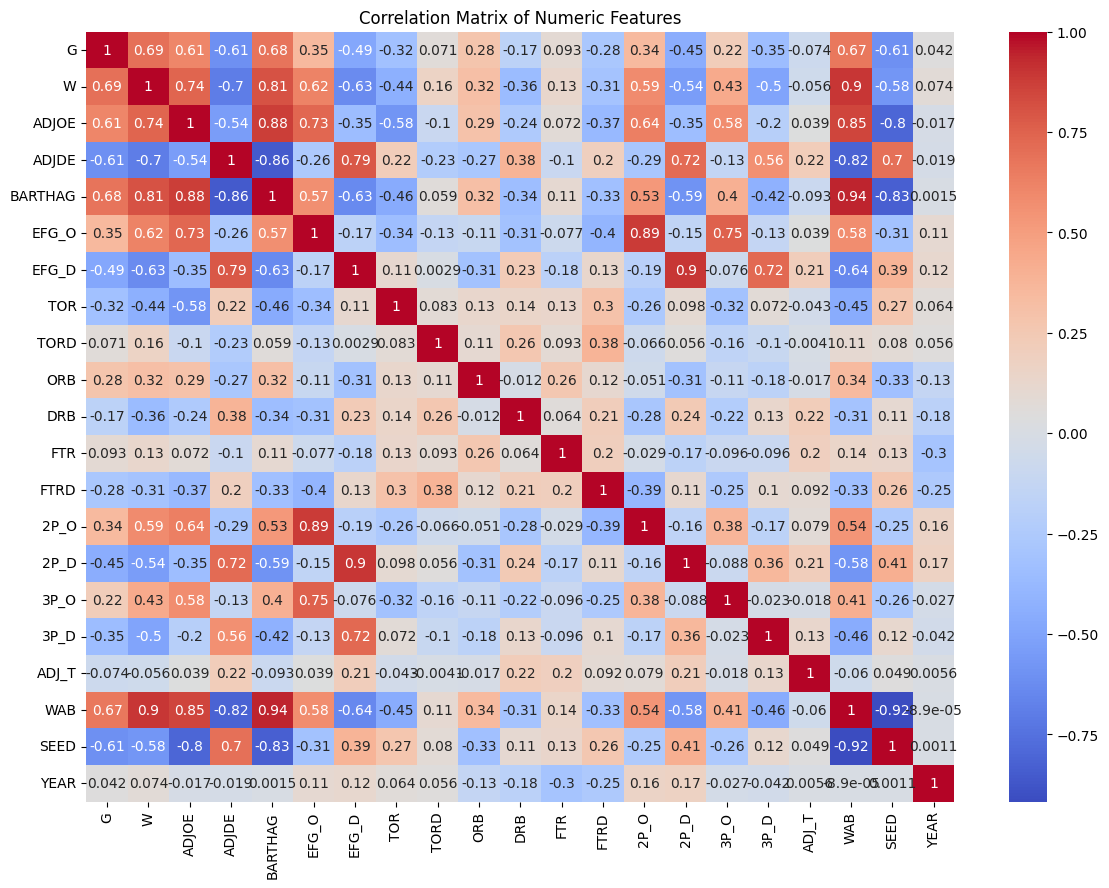

In [5]:
# Select only numeric columns automatically
df_corr = df.select_dtypes(include=[np.number])

# Now plot correlation
plt.figure(figsize=(14,10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## Distribution of the POSTSEASON classes

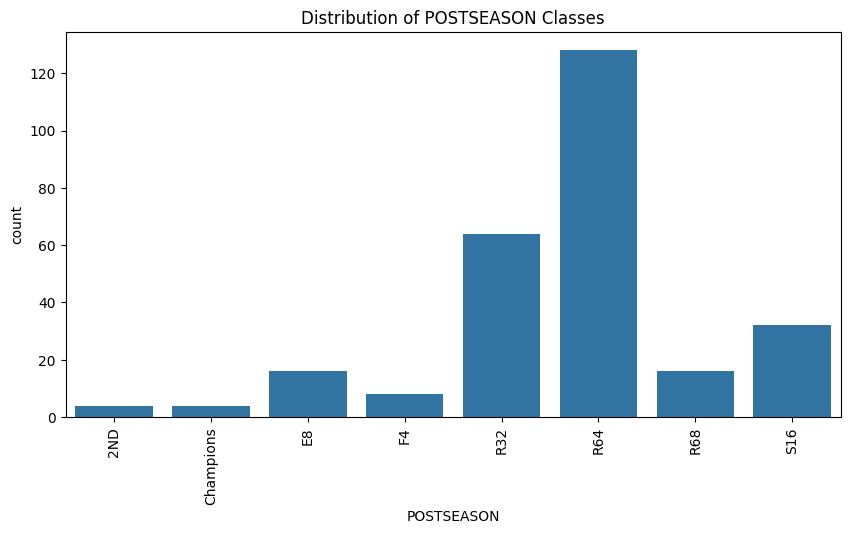

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='POSTSEASON', data=df)
plt.title('Distribution of POSTSEASON Classes')
plt.xticks(rotation=90)
plt.show()

# 5. PRE-PROCESSING: FEATURE SELECTION AND FEATURE EXTRACTION

In [7]:
# Drop 'TEAM' since it's a non-numeric identifier
df = df.drop(['TEAM'], axis=1)

# Convert categorical POSTSEASON labels into numbers
le = LabelEncoder()
df['POSTSEASON'] = le.fit_transform(df['POSTSEASON'])

# Separate features and target
X = df.drop('POSTSEASON', axis=1)
y = df['POSTSEASON']

# 6. NORMALIZE THE DATA

In [9]:
X_encoded = pd.get_dummies(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 7. SPLIT THE DATASET INTO TRAINING AND TEST SETS

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. MODEL TRAINING

In [16]:
# Create an imputer
imputer = SimpleImputer(strategy='mean')  # or 'median', or 'most_frequent'

# Fit imputer on X_train and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

for name, model in models.items():
    model.fit(X_train_imputed, y_train)

# 9. MODEL EVALUATION

In [19]:
accuracies = {}
for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc


# 10. COMPARATIVE RESULTS ANALYSIS

plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

# FINAL RANKING

In [21]:
print("\n--- Final Model Ranking by Accuracy ---")
ranked_models = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
for rank, (model, score) in enumerate(ranked_models, start=1):
    print(f"{rank}. {model}: {score:.4f}")



--- Final Model Ranking by Accuracy ---
1. Decision Tree: 0.8794
2. Logistic Regression: 0.8546
3. KNN: 0.8121
4. SVM: 0.7979


# The End

In [23]:
from IPython.display import FileLink


FileLink('http://localhost:8888/notebooks/Dataset%20ML0101EN_EDX_skill_up.ipynb')


C:\Users\Hp\http:\localhost:8888\notebooks\Dataset%20ML0101EN_EDX_skill_up.ipynb